# Shreyans Murkute- E20CSE415

## Assignment 3_1

In [1]:
import pandas as pd

In [4]:
df= pd.read_excel('Real estate valuation data set.xlsx')

In [5]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
df1= df.drop(columns=['X2 house age'])
df1

,No,X1 transaction date,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,410,2013.000000,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,104.81010,5,24.96674,121.54067,52.5


In [8]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [10]:
x= df['X2 house age']
y= df['Y house price of unit area']


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
X_Train, x_test, Y_Train, y_test= train_test_split(x, y, test_size= 0.2)


In [35]:
Y_Train

182    23.6
308    53.0
139    42.5
236    61.9
59     42.4
       ... 
147    43.2
117    13.0
252    52.7
65     44.3
362    40.0
Name: Y house price of unit area, Length: 331, dtype: float64

In [22]:
import numpy as np
lin_reg_model= LinearRegression(n_jobs= -1)
lin_reg_model.fit(np.array(X_Train).reshape(-1, 1), np.array(Y_Train).reshape(-1, 1))

LinearRegression(n_jobs=-1)

In [27]:
print("Intercept: ", lin_reg_model.intercept_[0])
print("Slope: ", lin_reg_model.coef_[0][0])


Intercept:  41.18776665513494
Slope:  -0.20304439129209736


In [28]:
print("The equation is as follows: Y= House Age*", lin_reg_model.coef_[0][0], " + ",lin_reg_model.intercept_[0])

The equation is as follows: Y= House Age* -0.20304439129209736  +  41.18776665513494


In [30]:
predictions_test= lin_reg_model.predict(np.array(x_test).reshape(-1, 1))

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
print("mean sq error: ", mean_squared_error(predictions_test, y_test))
print("r2_score: ", r2_score(predictions_test, y_test))

mean sq error:  209.6422237397815
r2_score:  -39.005967356918745


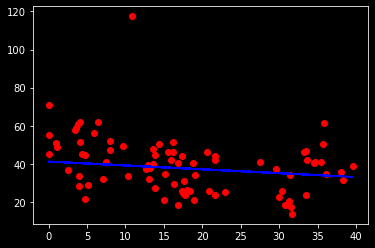

In [39]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.plot(x_test, y_test, 'ro')
plt.plot(x_test, predictions_test, 'b-')
plt.show();

mean sq error for  X3 distance to the nearest MRT station  column:  77.46089937291983
r2_score for X3 distance to the nearest MRT station  column:  -0.9604212989353349 



mean sq error for  X4 number of convenience stores  column:  121.9536314052953
r2_score for X4 number of convenience stores  column:  -1.2235696478892142 



mean sq error for  X5 latitude  column:  81.98062057875995
r2_score for X5 latitude  column:  -0.5902958358877255 



mean sq error for  X6 longitude  column:  131.46098148314832
r2_score for X6 longitude  column:  -2.225363402490012 





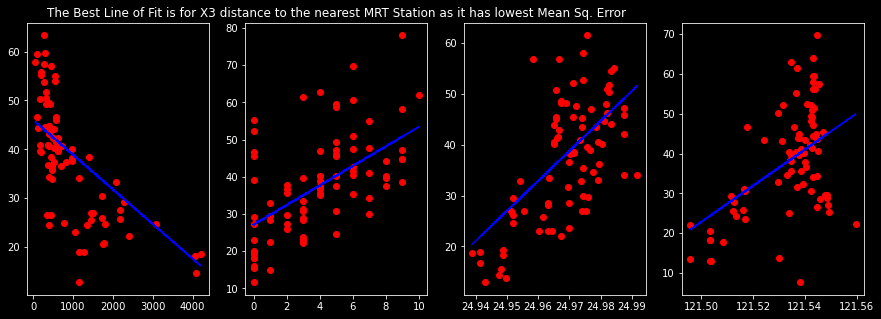

In [63]:
plt.rcParams['figure.figsize']= (15, 5)
fig, axes= plt.subplots(1, 4)
ranger= 0
for k in df.columns[3:-1]:
    X1= df[k]
    X_Train, x_test, Y_Train, y_test= train_test_split(X1, y, test_size= 0.2)
    lin_reg_model= LinearRegression(n_jobs= -1)
    lin_reg_model.fit(np.array(X_Train).reshape(-1, 1), np.array(Y_Train).reshape(-1, 1))
    predictions_test= lin_reg_model.predict(np.array(x_test).reshape(-1, 1))
    axes[ranger].plot(x_test, y_test, 'ro')
    axes[ranger].plot(x_test, predictions_test, 'b-')
    ranger+=1
    print("mean sq error for ",k," column: ", mean_squared_error(predictions_test, y_test))
    print("r2_score for", k ," column: ", r2_score(predictions_test, y_test), '\n\n\n')

axes[1].set_title("The Best Line of Fit is for X3 distance to the nearest MRT Station as it has lowest Mean Sq. Error")
plt.show();